# Практика

In [286]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import math
%matplotlib inline

import statsmodels.stats.weightstats as ssw

import seaborn as sns
import os
import requests
import io
import re

## ЦПТ для различных распределений
Возьмите то непрерывное распределение, которое вам больше всего понравится из списка доступных в модуле [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html).

### Сгенерируйте примеры из распределения

In [287]:
# ваш код тут
arcsin_rv = sts.arcsine()
sample = arcsin_rv.rvs(100)

# например вот такое распределение https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.cosine.html#scipy.stats.cosine
#cosine_rv = sts.cosine()
#sample = cosine_rv.rvs(100)

sample[:5]

array([0.95041037, 0.58655325, 0.98311013, 0.0027054 , 0.46366454])

In [288]:
mean, var, skew, kurt = arcsin_rv.stats(moments='mvsk')
np.array([mean, var])

array([0.5  , 0.125])

In [289]:
sample.dtype

dtype('float64')

In [290]:
real_mean = arcsin_rv.mean() # настоящее среднее случайной величины
real_mean

0.5

In [291]:
real_var = arcsin_rv.var() # настоящая дисперсия случайной величины
real_var

0.125

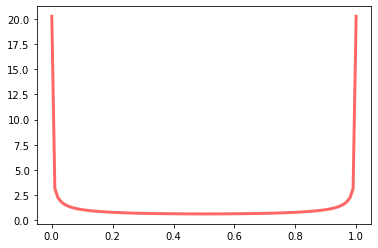

In [292]:
fig, ax = plt.subplots(1, 1)

x = np.linspace(arcsin_rv.ppf(0.01),
                arcsin_rv.ppf(0.99), 100)
ax.plot(x, arcsin_rv.pdf(x),
       'r-', lw=3, alpha=0.6, label='arcsine pdf')

### Постройте гистограмму выборки и теоретическую плотность распределения

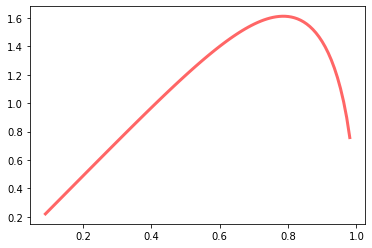

In [293]:
fig, ax = plt.subplots(1, 1)
argus_rv = sts.argus(1)
x = np.linspace(argus_rv.ppf(0.01),
                argus_rv.ppf(0.99), 100)
ax.plot(x, argus_rv.pdf(x),
       'r-', lw=3, alpha=0.6, label='arcsine pdf')

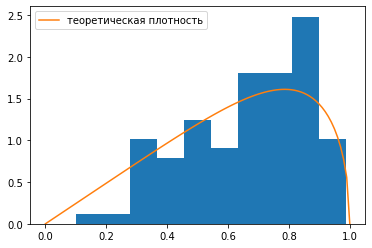

In [294]:
# ваш код тут
chi=1
argus_rv = sts.argus(chi)
sample = argus_rv.rvs(100)

plt.hist(sample, density=True)
#x = np.linspace(argus_rv.ppf(0.01), argus_rv.ppf(0.99), 100)
x = np.linspace(0, 1, 100)

pdf = argus_rv.pdf(x)
plt.plot(x, pdf, label='теоретическая плотность', alpha=1)
plt.legend()

In [295]:
sample_mean = sample.mean() # выборочное среднее
print(sample_mean)
sample_var = sample.var() # выборочная дисперсия
print(sample_var)

0.6679516747337574
0.04064587215622604


### Оценим распределение выборочного среднего для разных объёмов выборок
Для этого постройте на одном полотне гистограмму выборочных средних и теоретическое распределение выборочных средних по ЦПТ для разных объёмов выборок.

Для теоретического распределение используйте настоящие значения мат ожидания и дисперсии (не приближенные на основе выборки).

In [296]:
c = 2.07
dweibull = sts.dweibull(c)
sample = dweibull.rvs(100)
sample[:10]

array([-0.84438606,  2.02985874,  0.96336223, -0.50996304,  0.51063194,
        1.61992475, -0.93151446,  0.5178455 ,  0.77499989, -1.03596002])

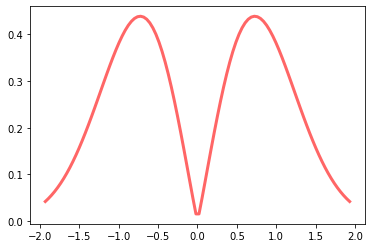

In [297]:
fig, ax = plt.subplots(1, 1)
x = np.linspace(dweibull.ppf(0.01),
                dweibull.ppf(0.99), 100)
ax.plot(x, dweibull.pdf(x),
       'r-', lw=3, alpha=0.6, label='arcsine pdf')

In [298]:
mean, var, skew, kurt = dweibull.stats(moments='mvsk') #параметр "c" уже задан в sts.dweibull()
print(mean, var)

0.0 0.9861708479306039


(array([1.22812593e-03, 2.45625187e-03, 2.45625187e-03, 0.00000000e+00,
        1.22812593e-03, 2.45625187e-03, 1.22812593e-03, 4.91250374e-03,
        4.91250374e-03, 1.22812593e-02, 9.82500748e-03, 1.47375112e-02,
        7.36875561e-03, 1.59656371e-02, 1.10531334e-02, 2.08781409e-02,
        2.45625187e-02, 2.70187706e-02, 3.07031484e-02, 4.05281558e-02,
        6.50906745e-02, 7.24594301e-02, 7.12313042e-02, 8.47406895e-02,
        1.03162578e-01, 9.57938229e-02, 1.32637601e-01, 1.57200120e-01,
        1.89131394e-01, 1.65797001e-01, 2.11237661e-01, 2.88609595e-01,
        2.83697091e-01, 2.98434602e-01, 3.54928395e-01, 3.74578410e-01,
        4.40897210e-01, 4.50722218e-01, 5.61253552e-01, 6.15291093e-01,
        6.91434901e-01, 7.47928694e-01, 8.68285036e-01, 8.78110043e-01,
        9.96010133e-01, 1.05618830e+00, 1.15566650e+00, 1.23058219e+00,
        1.35585103e+00, 1.41111670e+00, 1.57568557e+00, 1.69235754e+00,
        1.67270752e+00, 1.81148575e+00, 2.01535466e+00, 2.120973

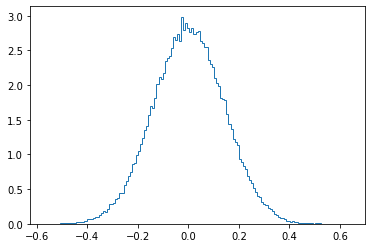

In [345]:
# ваш код тут
N = 50
NN = 100000
# сгенерируем много выборочных средних
means = []
for i in range(NN):
    means.append(np.mean(dweibull.rvs(N)))
plt.hist(means, density=True, bins='auto', histtype='step')


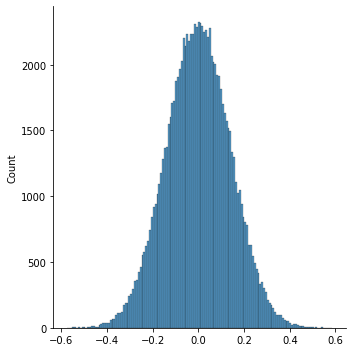

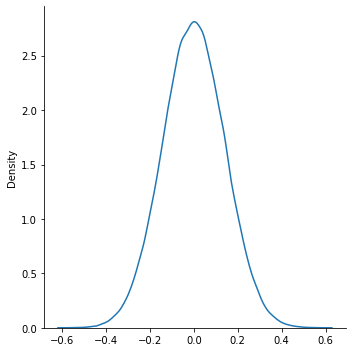

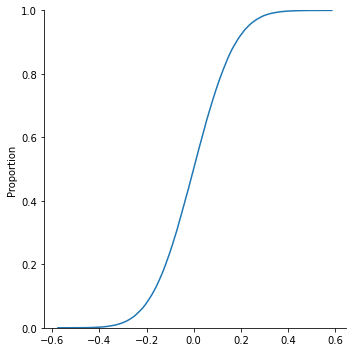

In [300]:
sns.displot(means)
sns.displot(means, kind='kde')
sns.displot(means, kind='ecdf')

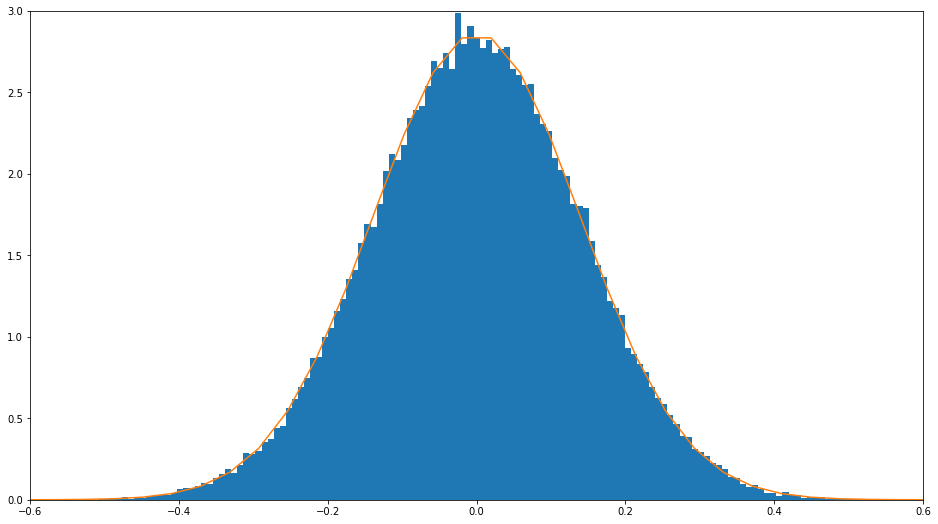

In [346]:
plt.figure(figsize=(16,9))
plt.axis([-0.6,0.6,0,3])
plt.hist(means, density=True, bins='auto')

norm_rv = sts.norm(mean, var/np.sqrt(N))
plt.plot(x, norm_rv.pdf(x), label='теоретическая плотность', alpha=1)

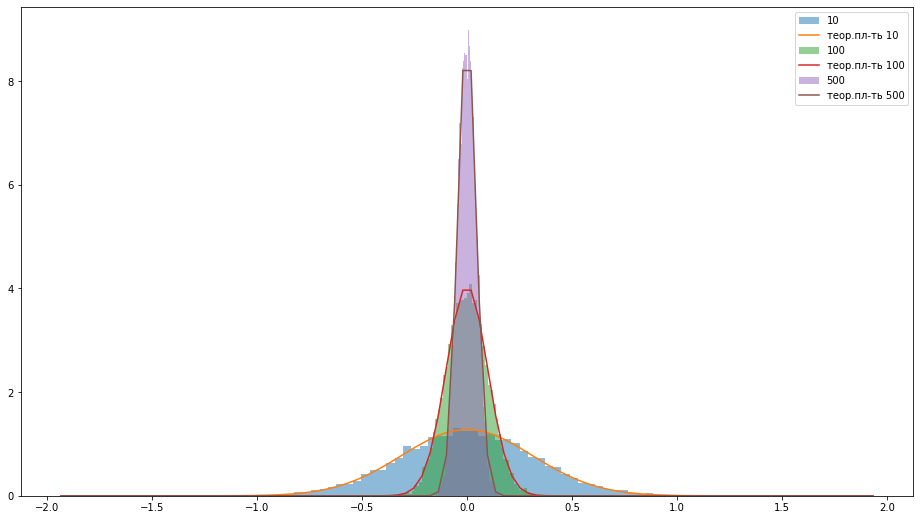

In [342]:
plt.figure(figsize=(16,9))
# сгенерируем много выборочных средних
for N in [10, 100, 500]:
    means = []
    for i in range(10000):
         means.append(np.mean(dweibull.rvs(N)))
    plt.hist(means, density=True, bins='auto', alpha=0.5, label=f'{N}')
    
    x = np.linspace(dweibull.ppf(0.01), dweibull.ppf(0.99), 100)
    norm_rv = sts.norm(mean, var/np.sqrt(N))
    plt.plot(x, norm_rv.pdf(x), label=f'теор.пл-ть {N}', alpha=1)

plt.legend()
plt.show()

Как вы считаете, для выбранного распределения апроксимация распределения выборочного среднего работает хорошо или плохо?
**Ваш ответ:**

##### Хорошо. Теоретическая плотность распределения с N=50 (10, 100, 500) огибает выборочные

## Доверительный интервал на основе ЦПТ
Возьмите данные для оттока телеком компании, и постройте доверительные интервалы для среднего значения total day calls, используя центральную предельную теорему в разбиении по колонке churn (ушел/не ушел). 

Для оценки дисперсии используйте несмещенную оценку (параметр ddof=1).

Сделайте оценку с использованием явной формулы для z интервала, а затем с помощью функций 
`from statsmodels.stats.weightstats import _zconfint_generic`. Сравните результаты.


Ссылка на данные: https://drive.google.com/file/d/1X_drKqoarnU2Sz2har7uSCsgyhh8Xtz8/view?usp=sharing

In [341]:
# Для инфо
# Чем больше N, тем более узок дов.интервал из-за уменьшения дисперсии (стандартного отклонения) распределения средних
N = 10000
dweibull = sts.dweibull(2.07)
data = dweibull.rvs(N)
print("Доверительный интервал для среднего по цпт, если нам известна дисперсия: [{}, {}] ".format(
    np.mean(data) - 1.96 * dweibull.std() / np.sqrt(N), np.mean(data) + 1.96 * dweibull.std() / np.sqrt(N) 
))
print("Доверительный интервал для среднего по цпт интервальная оценка: {} ".format(
    sts.norm.interval(alpha=0.95, loc=np.mean(data), 
                      scale=np.std(data, ddof=1)/np.sqrt(N)) # alternative 'two-sided' only
))

print("Доверительный интервал для среднего по цпт методом _zconfint_generic: {} ".format(
    ssw._zconfint_generic(np.mean(data),  np.std(data, ddof=1)/np.sqrt(N), alpha=0.95, alternative='two-sided')
))

Доверительный интервал для среднего по цпт, если нам известна дисперсия: [-0.015660774082242916, 0.023267230898285987] 
Доверительный интервал для среднего по цпт интервальная оценка: (-0.015666575180711628, 0.0232730319967547) 
Доверительный интервал для среднего по цпт методом _zconfint_generic: (0.003180314589264206, 0.004426142226778867) 


In [304]:
url ="https://raw.githubusercontent.com/piton1/DS/Lesson_5/telecom_churn.csv"
df=pd.read_csv(url)
df.tail()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False
3332,TN,74,415,400-4344,no,yes,25,234.4,113,39.85,...,82,22.60,241.4,77,10.86,13.7,4,3.70,0,False


In [305]:
# посчитали кол-во: ушел/ не ушел
df.groupby('churn').agg('count').iloc[:,0]

churn
False    2850
True      483
Name: state, dtype: int64

In [306]:
total_calls_stay = df[df.churn == False]['total day calls']
total_calls_gone = df[df.churn == True]['total day calls']
print(total_calls_stay.mean(), total_calls_gone.mean(), sep='\n')

100.28315789473685
101.33540372670808


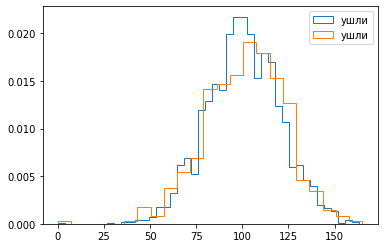

In [307]:
# На начальном этапе становится понятно, что нет сильной зависимости между total day calls и churn
# Распределения не скошенные, можно применять ЦПТ
plt.hist(total_calls_stay, density=True, bins='auto', histtype='step', label='ушли')
plt.hist(total_calls_gone, density=True, bins='auto', histtype='step', label='ушли')
plt.legend()

In [308]:
# Построим для примера доверительный интервал для среднего "не ушел" по всем значениям
# Понятно, что из-за высокого N дов.интервал не информативен. Мы получили интервал 95% просто для огромного усреднения
data = total_calls_stay

print("Доверительный интервал для среднего по цпт интервальная оценка: {} ".format(
    sts.norm.interval(alpha=0.95, loc=np.mean(data), 
    scale=np.std(data, ddof=1)/np.sqrt(len(data))) ))

print("Доверительный интервал для среднего по цпт методом _zconfint_generic: {} ".format(
    ssw._zconfint_generic(np.mean(data),  np.std(data, ddof=1)/np.sqrt(len(data)), alpha=0.95, alternative='two-sided') ))

Доверительный интервал для среднего по цпт интервальная оценка: (99.55618833318324, 101.01012745629045) 
Доверительный интервал для среднего по цпт методом _zconfint_generic: (100.25989934548421, 100.30641644398948) 


In [309]:
# Создаем список из независимых средних "ушел"
N = 20
total_calls_gone_means = []

for i in range(0, len(total_calls_gone)-N, N):
    a = sum([total_calls_gone.iloc[i+j] for j in range(N)])/N
    total_calls_gone_means.append(a)
print(total_calls_gone_means)
print(len(total_calls_gone_means))

[104.45, 101.95, 84.65, 99.45, 100.2, 106.4, 111.5, 95.8, 86.9, 98.2, 102.25, 102.3, 109.2, 101.1, 105.75, 101.05, 106.9, 100.7, 107.35, 98.1, 94.7, 102.35, 101.0, 108.4]
24


In [310]:
# Создаем список из независимых средних "не ушел"
N = 20
total_calls_stay_means = []

for i in range(0, len(total_calls_stay)-N, N):
    a = sum([total_calls_stay.iloc[i+j] for j in range(N)])/N
    total_calls_stay_means.append(a)
print(total_calls_stay_means)

[99.8, 94.7, 97.5, 96.8, 103.75, 105.35, 103.6, 104.7, 95.4, 102.5, 102.35, 101.3, 100.15, 104.05, 102.6, 103.3, 101.75, 97.1, 101.45, 106.6, 110.85, 103.65, 100.0, 94.65, 93.55, 94.8, 104.05, 99.9, 108.25, 99.0, 95.65, 107.0, 99.1, 101.85, 93.4, 100.95, 93.35, 107.35, 95.55, 98.0, 106.9, 96.9, 100.0, 99.8, 99.35, 97.4, 105.35, 102.3, 102.2, 92.4, 98.8, 94.65, 91.65, 97.25, 97.9, 100.15, 107.4, 106.4, 102.75, 105.3, 102.95, 92.2, 105.95, 108.05, 95.8, 103.45, 97.4, 96.85, 98.0, 101.0, 102.5, 100.85, 96.55, 99.05, 102.0, 98.75, 103.35, 96.85, 101.1, 97.65, 110.05, 99.8, 101.7, 105.9, 97.3, 98.1, 104.25, 102.5, 103.75, 102.7, 92.2, 91.75, 99.55, 94.25, 103.15, 99.45, 97.75, 102.3, 88.4, 98.6, 97.05, 96.55, 101.45, 95.85, 102.95, 104.5, 102.8, 100.3, 105.65, 104.0, 93.5, 100.7, 106.0, 110.5, 99.9, 89.6, 108.35, 110.25, 95.0, 103.85, 100.35, 100.7, 109.15, 91.6, 98.85, 95.3, 100.35, 92.4, 97.2, 103.35, 100.85, 92.45, 100.25, 102.8, 105.85, 100.9, 95.0, 103.85, 92.55, 97.0, 103.1, 102.6]


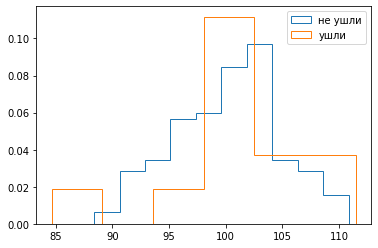

In [311]:
# Проверим, достаточно ли данных для приближеия к норм.распределению. По "ушел" график рваный, т.к. выборка более ограничена
plt.hist(total_calls_stay_means, density=True, bins='auto', histtype='step', label='не ушли')
plt.hist(total_calls_gone_means, density=True, bins='auto', histtype='step', label='ушли')
plt.legend()

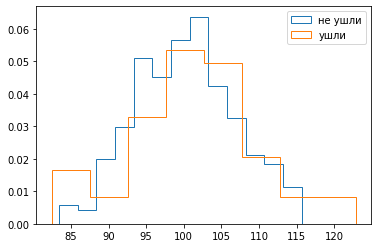

In [312]:
# Попробуем взять N=10 в виду малой выборки "ушел" для получения графика близкого к нормальному
# Уже похоже на нормальные распределения, в т.ч. сгладилась правая ветка (синяя) выборочного распределения по средним "не ушел"
N = 10
total_calls_gone_means = []
total_calls_stay_means = []

for i in range(0, len(total_calls_gone)-N, N):
    a = sum([total_calls_gone.iloc[i+j] for j in range(N)])/N
    total_calls_gone_means.append(a)

for i in range(0, len(total_calls_stay)-N, N):
    a = sum([total_calls_stay.iloc[i+j] for j in range(N)])/N
    total_calls_stay_means.append(a)

plt.hist(total_calls_stay_means, density=True, bins='auto', histtype='step', label='не ушли')
plt.hist(total_calls_gone_means, density=True, bins='auto', histtype='step', label='ушли')
plt.legend()

In [313]:
mean_stay = np.mean(total_calls_stay)
mean_gone = np.mean(total_calls_gone)
std_stay = np.std(total_calls_stay, ddof=1)
std_gone = np.std(total_calls_gone, ddof=1)
print(mean_stay, mean_gone, std_stay, std_gone)

100.28315789473685 101.33540372670808 19.801156951805293 21.58230721307551


In [336]:
# Возьмем N=50 для интерпретируемого результата по ЦПТ, выборочное среднее
  # и стандартное отклонение определяются по всем значениям "ушел"/"не ушел"
# Доверительные интервалы для "не ушел"
N = 50
data = total_calls_stay

print("Доверительный интервал для среднего по цпт интервальная оценка: {} ".format(
    sts.norm.interval(alpha=0.95, loc=np.mean(data), 
    scale=np.std(data, ddof=1)/np.sqrt(N)) ))

print("Доверительный интервал для среднего по цпт методом _zconfint_generic: {} ".format(
    ssw._zconfint_generic(np.mean(data),  np.std(data, ddof=1)/np.sqrt(N), alpha=0.95, alternative='two-sided') ))

Доверительный интервал для среднего по цпт интервальная оценка: (94.79465806552581, 105.77165772394788) 
Доверительный интервал для среднего по цпт методом _zconfint_generic: (100.10755969867486, 100.45875609079883) 


In [337]:
#Доверительные для "ушел"
data = total_calls_gone

print("Доверительный интервал для среднего по цпт интервальная оценка: {} ".format(
    sts.norm.interval(alpha=0.95, loc=np.mean(data), 
    scale=np.std(data, ddof=1)/np.sqrt(N)) ))
    
print("Доверительный интервал для среднего по цпт методом _zconfint_generic: {} ".format(
    ssw._zconfint_generic(np.mean(data),  np.std(data, ddof=1)/np.sqrt(N), alpha=0.95, alternative='two-sided') ))

Доверительный интервал для среднего по цпт интервальная оценка: (95.35320330572988, 107.31760414768628) 
Доверительный интервал для среднего по цпт методом _zconfint_generic: (101.14401015194395, 101.52679730147221) 


In [338]:
#Осталось не ясно, почему если убрать деление станд.откл-я в формулах, то zconfint оценивает так же узко
  # Дисперсия сильно растет, значит, по логике как и в явной функии дов.инт-л должен сильно расшириться
  # В документации statsmodels ответа не нашел, логика работы statsmodels.stats.weightstats._zconfint_generic идентична 
data = total_calls_gone

print("Доверительный интервал для среднего по цпт интервальная оценка: {} ".format(
    sts.norm.interval(alpha=0.95, loc=np.mean(data), 
    scale=np.std(data, ddof=1)) ))
    
print("Доверительный интервал для среднего по цпт методом _zconfint_generic: {} ".format(
    ssw._zconfint_generic(np.mean(data),  np.std(data, ddof=1), alpha=0.95, alternative='two-sided') ))

Доверительный интервал для среднего по цпт интервальная оценка: (59.03485888580106, 143.63594856761512) 
Доверительный интервал для среднего по цпт методом _zconfint_generic: (99.98204678079553, 102.68876067262063) 


### Вывод: Оценка дов. инт-лов с помощью явной функции более широкая. Открыт вопрос по логике работы zconfint